In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = False
mode = 'accuracy'

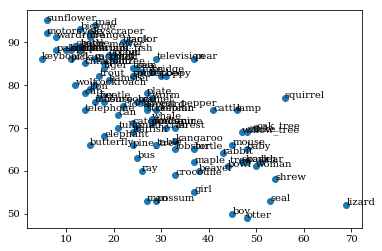

In [2]:
import csv

classes = []
params = np.zeros((100, 3))

with open('cifar100_output_df.csv', 'r') as f:
    reader = csv.DictReader(f)
    for i, line in enumerate(reader):
        classes.append(line['Predicted_Class_k'])
        params[i, 0] = int(line['R_k'])
        params[i, 1] = int(line['N_k']) - int(line['R_k'])
        params[i, 2] = float(line['Conf_k'])
        
params[:, 0:2] += 1

plt.scatter(params[:,1], params[:,0])
for i, _class in enumerate(classes):
    plt.annotate(_class, (params[i,1], params[i,0]))

In [3]:
# Sort by accuracy
accuracy = params[:,0] / (params[:,0] + params[:,1])
sort_idx = np.argsort(accuracy)

params = params[sort_idx,:]
classes = [classes[i] for i in sort_idx]

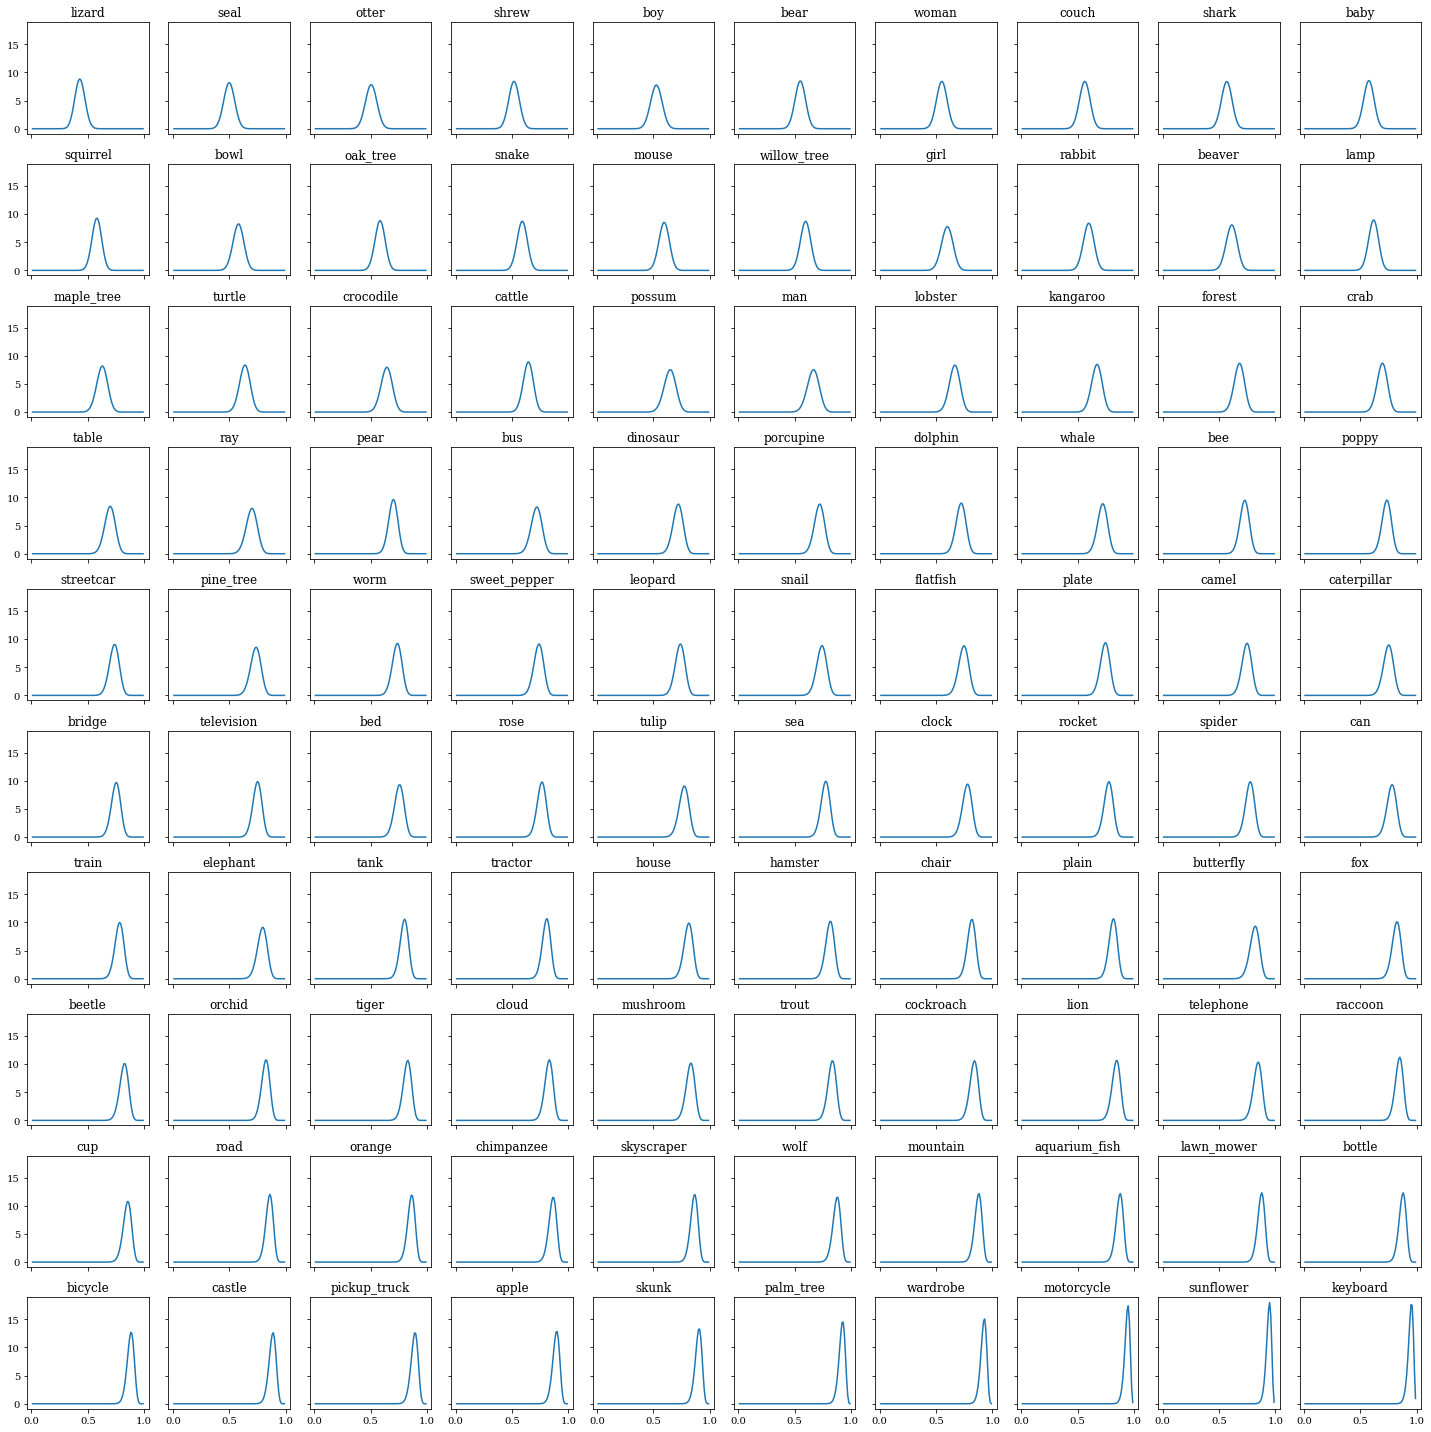

In [4]:
x = np.linspace(0.01, 0.99, 100)

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(x, y)
    ax.set_title(predicted_class)

fig.tight_layout()

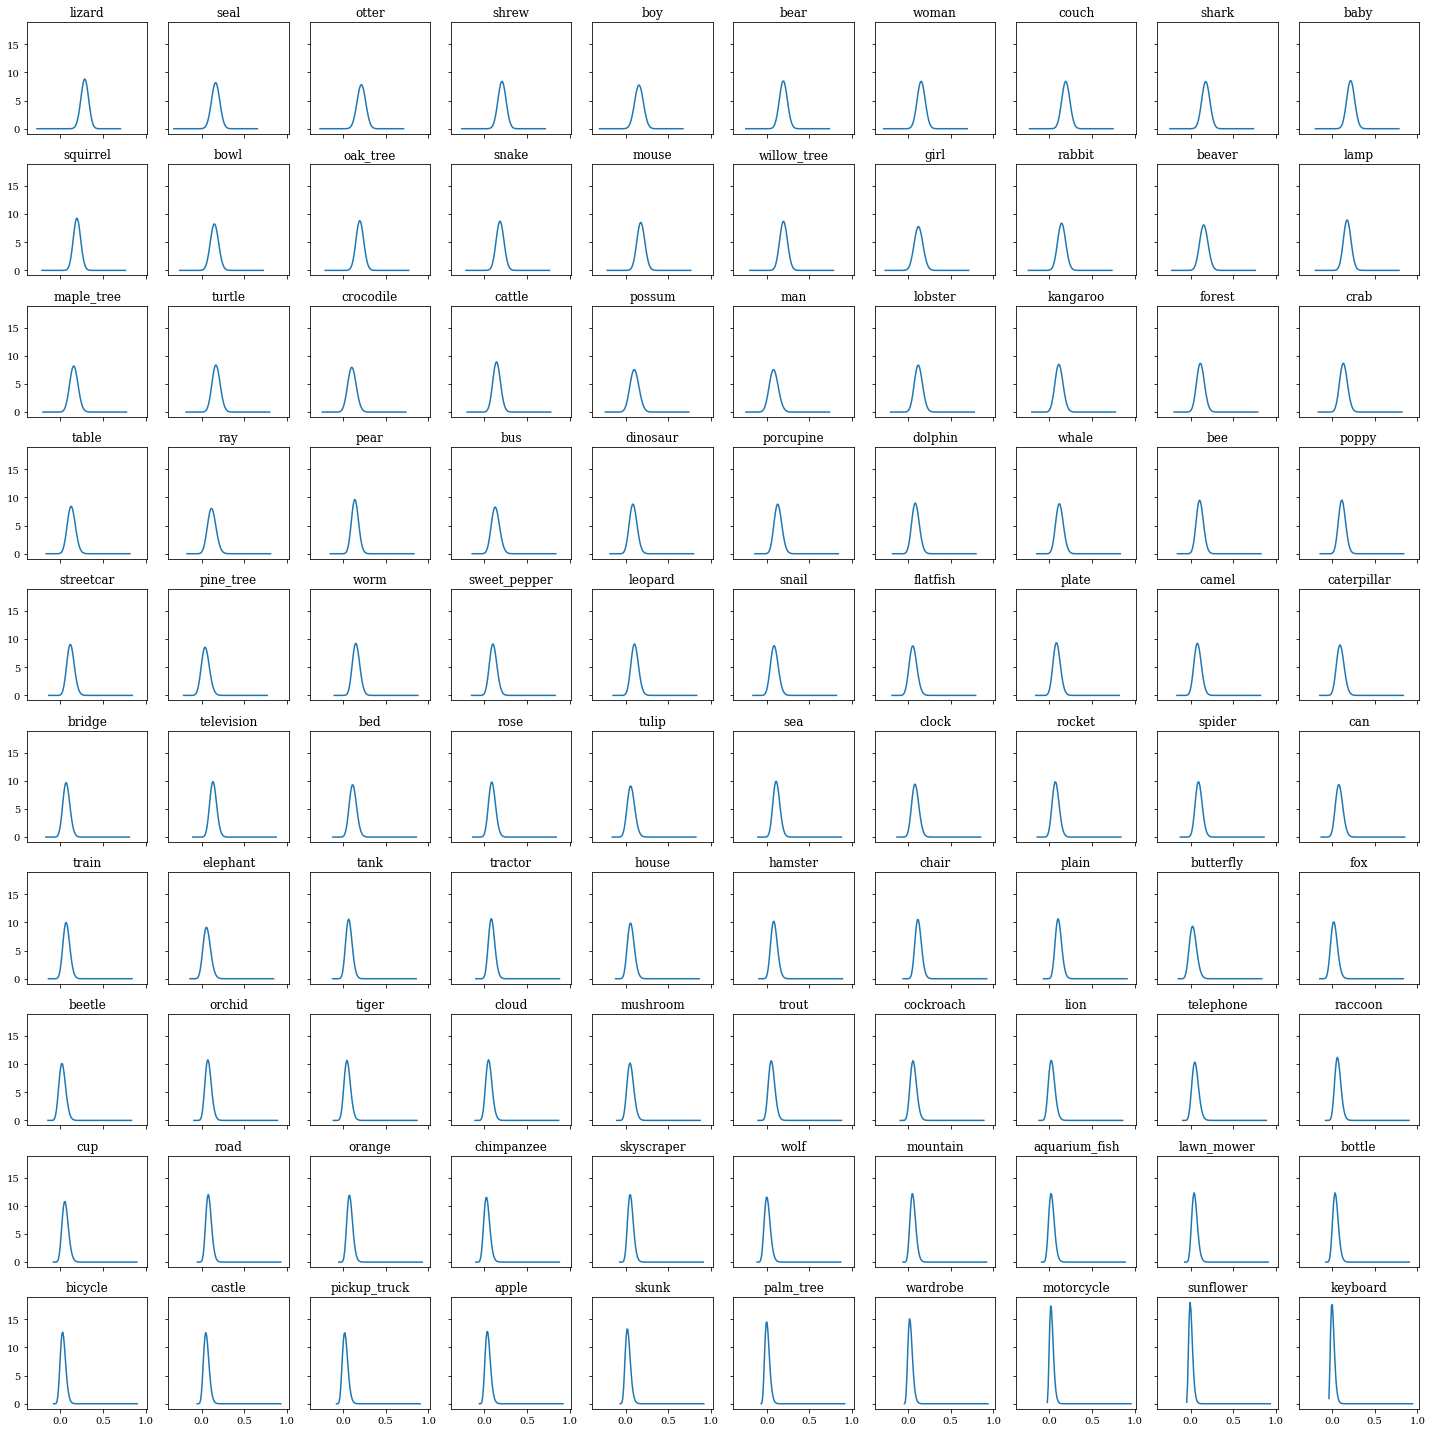

In [5]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(_params[2] - x, y)
    ax.set_title(predicted_class)
    
fig.tight_layout()

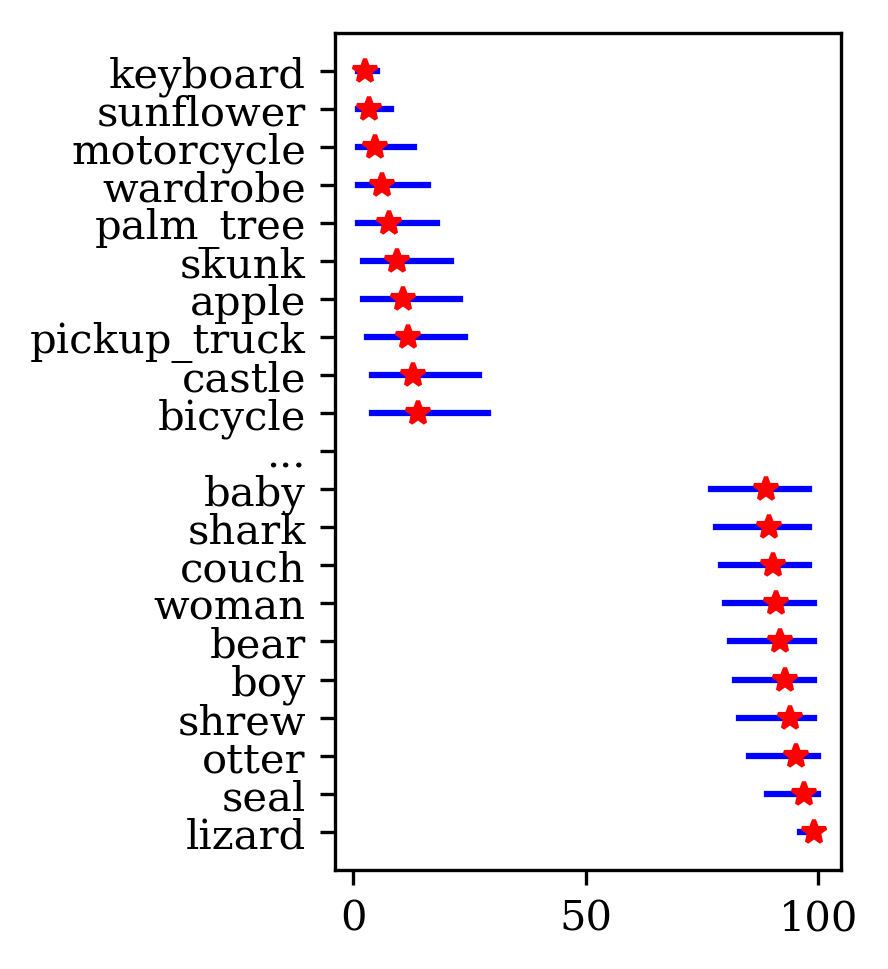

In [6]:
# Single column
plt.figure(figsize=(3.03, 3.03*1.1), dpi=300)
# # # Double column
# plt.figure(figsize=(6.30, 6.30), dpi=300)

n_samples = 10_000
monte_carlo_samples = np.zeros((100, n_samples))

# Accuracy ranking
if mode == 'accuracy':
    for i in range(100):
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples)

# Bias ranking
if mode == 'bias':
    for i in range(100):
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples) - params[i, 2]

    
ranks = 100 - np.argsort(monte_carlo_samples, axis=0)
intervals = np.quantile(ranks, (0.05, 0.95), axis=1)
avg_ranks = np.mean(ranks, axis=1)

for row, i in enumerate([i for i in range(10)]+[50]+[90+i for i in range(10)]):
    if i != 50: 
        plt.plot([intervals[0, i], intervals[1, i]], [row, row], c='blue')
        plt.plot(avg_ranks[i], row, marker='*', c='red')


plt.ylim(-1, 10*2+1)

plt.yticks(ticks = list(range(10*2+1)), labels = classes[:10] + ['...'] + classes[-10:]);
plt.tight_layout()
plt.savefig("ranking_cifar100_%s.pdf" % mode, format='pdf', dpi=300)

In [7]:
params[:,0]/(params[:,0] + params[:,1]) - params[:,2]

array([-0.28444373, -0.163175  , -0.21559589, -0.20823649, -0.15798421,
       -0.1940986 , -0.15346696, -0.19274512, -0.17776556, -0.22012561,
       -0.19466179, -0.15015344, -0.19823955, -0.18587815, -0.18014577,
       -0.1966382 , -0.12303836, -0.14466916, -0.15483739, -0.1795791 ,
       -0.15834974, -0.1695921 , -0.10638454, -0.14599431, -0.10549104,
       -0.08271795, -0.12212636, -0.11406531, -0.1166537 , -0.13689332,
       -0.12957714, -0.11939344, -0.14223532, -0.13282579, -0.09084581,
       -0.13182107, -0.08817122, -0.12052143, -0.10873268, -0.11940623,
       -0.12065603, -0.04508371, -0.15497346, -0.10600488, -0.10919288,
       -0.09006865, -0.05983924, -0.08726033, -0.08376096, -0.09968964,
       -0.07133023, -0.13616595, -0.11824798, -0.09288538, -0.06566923,
       -0.11396808, -0.08628307, -0.0752949 , -0.09650548, -0.08636947,
       -0.071776  , -0.06246066, -0.07167496, -0.08829857, -0.06470241,
       -0.08702857, -0.12051386, -0.10784922, -0.02979405, -0.02